In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import seaborn as sns
pd.options.display.max_columns=99

In [2]:
df = pd.read_csv('AmesHousing.tsv', delimiter='\t')

# cleaning

In [3]:
def transform_features(df): 
    #removing useless/ repetitive columns
    dfa = df.drop(columns=['Order','PID','Garage Cars']).copy()
    #removing columns with over 25% of their values missing
    dfb = dfa[dfa.columns[~((dfa.isna().sum() / len(dfa)) > .25)]].copy()
    #coverting one categorical feature labeled with integers to string
    dfb['MS SubClass'] = dfb['MS SubClass'].astype('str')
    #filling missing values of columns with less than 25% of their values missing with their column mean/mode
    num_cols = dfb.select_dtypes(include=['int64','float64']).columns
    cat_cols = dfb.select_dtypes('object').columns
    dfc = pd.DataFrame()
    dfc[num_cols] = dfb[num_cols].fillna(dfb[num_cols].mean()).copy()
    dfc[cat_cols] = dfb[cat_cols].fillna(dfb[cat_cols].mode().iloc[0]).copy()
    #normalizing numerical columns, except the price column
    num_cols = num_cols.drop('SalePrice')
    dfc[num_cols] = (dfc[num_cols] - dfc[num_cols].min()) / (dfc[num_cols].max() - dfc[num_cols].min())
    return dfc



In [4]:
dft = transform_features(df)
dft

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,0.410959,0.142420,0.555556,0.500,0.637681,0.166667,0.070000,0.113218,0.000000,0.188784,0.176759,0.277673,0.000000,0.0,0.249058,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.50,0.208333,0.354839,0.147472,0.083558,0.000000,0.0,0.000000,0.0,0.000000,0.363636,1.0,215000,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.000000,0.082920,0.094364,0.115582,0.144354,0.118042,0.000000,0.0,0.105878,0.000000,0.0,0.25,0.0,0.250,0.333333,0.230769,0.00,0.211538,0.490591,0.098315,0.000000,0.000000,0.0,0.208333,0.0,0.000000,0.454545,1.0,105000,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.067500,0.163536,0.000000,0.173801,0.217512,0.208990,0.000000,0.0,0.187453,0.000000,0.0,0.25,0.5,0.375,0.333333,0.307692,0.00,0.201923,0.209677,0.275983,0.048518,0.000000,0.0,0.000000,0.0,0.735294,0.454545,1.0,172000,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,0.246575,0.046087,0.666667,0.500,0.695652,0.300000,0.000000,0.188696,0.000000,0.447346,0.345336,0.373031,0.000000,0.0,0.334589,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.50,0.233974,0.350806,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.272727,1.0,244000,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.000000,0.140149,0.000000,0.058647,0.151882,0.124764,0.339467,0.0,0.243971,0.000000,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.326923,0.323925,0.148876,0.045822,0.000000,0.0,0.000000,0.0,0.000000,0.181818,1.0,189900,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
5,0.195205,0.040562,0.555556,0.625,0.913043,0.800000,0.012500,0.106662,0.000000,0.138699,0.151555,0.124344,0.328329,0.0,0.239261,0.000000,0.0,0.50,0.5,0.375,0.333333,0.384615,0.25,0.330128,0.315860,0.252809,0.048518,0.000000,0.0,0.000000,0.0,0.000000,0.454545,1.0,195500,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
6,0.068493,0.016920,0.777778,0.500,0.934783,0.850000,0.000000,0.109142,0.000000,0.309075,0.218985,0.210880,0.000000,0.0,0.189148,0.333333,0.0,0.50,0.0,0.250,0.333333,0.307692,0.00,0.339744,0.391129,0.000000,0.000000,0.167984,0.0,0.000000,0.0,0.000000,0.272727,1.0,213500,120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,CemntBd,CmentBd,None,Gd,TA,PConc,Gd,TA,M

# selecting

AxesSubplot(0.125,0.125;0.62x0.755)


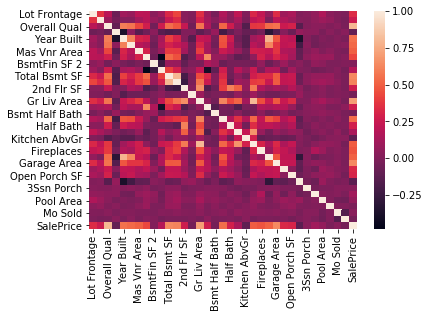

In [5]:
nums_t = dft.select_dtypes(include=['int64','float64'])
print(sns.heatmap(nums_t.corr()))


In [6]:
abs(nums_t.corr().SalePrice).sort_values(ascending=False)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Area        0.640385
Total Bsmt SF      0.632105
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.510684
Mas Vnr Area       0.505784
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432794
Lot Frontage       0.340751
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275894
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182805
Bedroom AbvGr      0.143913
Enclosed Porch     0.128787
Kitchen AbvGr      0.119814
Screen Porch       0.112151
Overall Cond       0.101697
Pool Area          0.068403
Low Qual Fin SF    0.037660
Bsmt Half Bath     0.035815
Mo Sold            0.035259
3Ssn Porch         0.032225
Yr Sold            0.030569
Misc Val           0.015691
BsmtFin SF 2       0.005890
Name: SalePrice, dty

we can see that overall home quality, living area, and garage area are among the factors most highly correlated with the home's sale price.

In [7]:
def select_features(dft, feats):
    dfs = dft[feats]
    cat_cols = dfs.select_dtypes('object').columns
    for col in cat_cols:
        cat_df = pd.get_dummies(dfs[col])
        dfs = pd.concat([dfs,cat_df],axis=1)
        dfs = dfs.drop(columns=col)
    dfs = pd.concat([dfs,dft.SalePrice],axis=1)
    return dfs


In [8]:
dfs = select_features(dft,['House Style'])

# training and testing

In [9]:
kf = KFold(2,True)
kf.split(dfs)
for tr, te in kf.split(dfs):
    print((tr))

[   0    2   10 ... 2922 2926 2928]
[   1    3    4 ... 2925 2927 2929]


In [10]:
dfs.head()

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,SalePrice
0,0,0,1,0,0,0,0,0,215000
1,0,0,1,0,0,0,0,0,105000
2,0,0,1,0,0,0,0,0,172000
3,0,0,1,0,0,0,0,0,244000
4,0,0,0,0,0,1,0,0,189900


In [27]:
def train_and_test(dfs,k=2):
    #sp = dfs.SalePrice
    #dfs = dfs.drop('SalePrice')
    lr = LinearRegression()
    kf = KFold(k,True)
    rmses = []
    for tr_in, te_in in kf.split(dfs):
        tr_df = dfs.iloc[tr_in]
        te_df = dfs.iloc[te_in]
        lr.fit(tr_df.drop(columns='SalePrice'),tr_df.SalePrice)
        #preds_tr = lr.predict(tr_df.drop(columns='SalePrice'))
        preds_te = lr.predict(te_df.drop(columns='SalePrice'))
        #mse_tr = mean_squared_error(tr_df.SalePrice,preds_tr)
        mse_te = mean_squared_error(te_df.SalePrice,preds_te)
        #rmse_tr = mse_tr ** .5
        rmse_te = mse_te ** .5
        rmses.append(rmse_te)
        print(rmses)
    return np.mean(rmses)

In [39]:
train_and_test(dfs)

[35467.24024660678]
[35467.24024660678, 51520903223988.58]


25760451629727.91

## testing univariate models

In [13]:
d_uni={}
for col in dft.drop(columns='SalePrice'):
    dfs = select_features(dft,[col])
    rmse = train_and_test(dfs)
    d_uni[col] = rmse
d_uni

[76069.1853297453]
[76069.1853297453, 74284.05198685847]
[77383.96684970832]
[77383.96684970832, 78646.64400883557]
[45620.86374752723]
[45620.86374752723, 50527.62698310972]
[81331.53692625226]
[81331.53692625226, 77546.27731420798]
[67966.98730637974]
[67966.98730637974, 64607.1337121805]
[68212.91857343254]
[68212.91857343254, 66980.37538565345]
[68334.939393762]
[68334.939393762, 69549.67823234494]
[70537.45648519865]
[70537.45648519865, 74845.67207051051]
[82116.83905812252]
[82116.83905812252, 78069.97933160928]
[74767.0531133219]
[74767.0531133219, 82616.30596630814]
[63911.31510950823]
[63911.31510950823, 60604.27840907103]
[64930.8602436753]
[64930.8602436753, 60103.205062656794]
[77396.78233765704]
[77396.78233765704, 76476.35037493274]
[81479.3959575728]
[81479.3959575728, 78131.71451226495]
[56966.46838585617]
[56966.46838585617, 56283.17251590079]
[78201.35742796675]
[78201.35742796675, 75387.69408119927]
[79311.24520590717]
[79311.24520590717, 80491.84250065876]
[63809.00

{'Lot Frontage': 75176.61865830189,
 'Lot Area': 78015.30542927195,
 'Overall Qual': 48074.24536531848,
 'Overall Cond': 79438.90712023011,
 'Year Built': 66287.06050928013,
 'Year Remod/Add': 67596.646979543,
 'Mas Vnr Area': 68942.30881305347,
 'BsmtFin SF 1': 72691.56427785457,
 'BsmtFin SF 2': 80093.4091948659,
 'Bsmt Unf SF': 78691.67953981503,
 'Total Bsmt SF': 62257.79675928963,
 '1st Flr SF': 62517.03265316605,
 '2nd Flr SF': 76936.56635629489,
 'Low Qual Fin SF': 79805.55523491887,
 'Gr Liv Area': 56624.820450878484,
 'Bsmt Full Bath': 76794.52575458301,
 'Bsmt Half Bath': 79901.54385328296,
 'Full Bath': 66902.33177136898,
 'Half Bath': 76550.29145395663,
 'Bedroom AbvGr': 79119.86541457045,
 'Kitchen AbvGr': 79348.77359737543,
 'TotRms AbvGrd': 69668.33012773929,
 'Fireplaces': 70296.65549460235,
 'Garage Yr Blt': 68702.20757444546,
 'Garage Area': 61627.85051301174,
 'Wood Deck SF': 75625.45439033411,
 'Open Porch SF': 75991.0576877598,
 'Enclosed Porch': 79395.46154778398,

In [14]:
pd.Series(d_uni).sort_values()

Overall Qual       4.807425e+04
Neighborhood       5.265076e+04
Gr Liv Area        5.662482e+04
Exter Qual         5.662889e+04
Kitchen Qual       5.833121e+04
Garage Area        6.162785e+04
Total Bsmt SF      6.225780e+04
1st Flr SF         6.251703e+04
Year Built         6.628706e+04
Full Bath          6.690233e+04
Garage Finish      6.692922e+04
Year Remod/Add     6.759665e+04
Foundation         6.790872e+04
Garage Yr Blt      6.870221e+04
Mas Vnr Area       6.894231e+04
MS SubClass        6.959155e+04
TotRms AbvGrd      6.966833e+04
Fireplaces         7.029666e+04
Heating QC         7.089424e+04
BsmtFin SF 1       7.269156e+04
Garage Type        7.299668e+04
Bsmt Exposure      7.300579e+04
BsmtFin Type 1     7.324818e+04
Sale Condition     7.454670e+04
Lot Frontage       7.517662e+04
Wood Deck SF       7.562545e+04
Open Porch SF      7.599106e+04
Lot Shape          7.646005e+04
Half Bath          7.655029e+04
Bsmt Full Bath     7.679453e+04
                       ...     
Kitchen 

the most effective univariate features were Overall Quality, Above Ground Living Area, and Exterior Material Quality. These are intuitively visible and important features of a home, so these ranking check out initially.

In [15]:
d_top = {}
for n in [3,5,10]:
    sett = pd.Series(d_uni).sort_values()[:n].index
    print(sett)
    dfs = select_features(dft,sett)
    rmse = train_and_test(dfs)    
    d_top[n] = rmse
d_top

Index(['Overall Qual', 'Neighborhood', 'Gr Liv Area'], dtype='object')
[34748.87560872017]
[34748.87560872017, 37735.076210909436]
Index(['Overall Qual', 'Neighborhood', 'Gr Liv Area', 'Exter Qual',
       'Kitchen Qual'],
      dtype='object')
[262403392037968.16]
[262403392037968.16, 2125617749057334.5]
Index(['Overall Qual', 'Neighborhood', 'Gr Liv Area', 'Exter Qual',
       'Kitchen Qual', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
       'Year Built', 'Full Bath'],
      dtype='object')
[284861074620978.4]
[284861074620978.4, 3743133585909729.5]


{3: 36241.975909814806, 5: 1194010570547651.2, 10: 2013997330265354.0}